In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

Exercise 1.1 - POINT A

In [3]:
def square(N,r):
    v = np.empty((N,2))
    ratio1 = 0
    ratio2 = 0
    if r < 1:
        #print("successful choice of r")
        i=0
        j=0
        while i < N:
            v[i] = np.random.rand(2)
            v[i,0] = v[i,0] - 0.5
            v[i,1] = v[i,1] - 0.5
            if mt.sqrt(v[i,0]**2 + v[i,1]**2) < r:
                j+=1
            else:
                j=j
            i+=1
        ratio1 = j/(N*r**2)
        ratio2 = np.pi * (r**2)
        #if abs((ratio1-ratio2)/ratio1) < 0.05:
        #    print("the 2 ratios are close")
        #else:
        #    print("the 2 ratios are not close")

    else:
        print("choose r<1")
    return (ratio1, ratio2)
square(1000,0.5)


(3.172, 0.7853981633974483)

Point B

In [4]:
def var_square(N):
    i=0
    a=np.empty((1,10))
    while i < 10:
        a[0,i] = square(N,0.5)[0]
        i+=1
    var = np.var(a)
    return var
var_square(50)

0.04281600000000001

Point C

daje
daje
daje


daje
daje


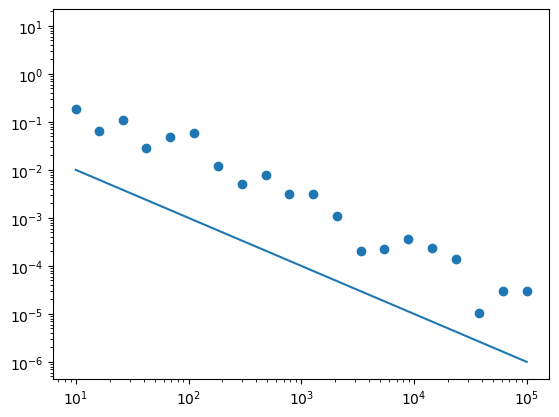

In [5]:
x = np.array(np.logspace(1, 5, 20, dtype=int))
print("daje")
vec_y = np.vectorize(var_square)
print("daje")
def f_inv(x):
    return 0.1/x
vec_yinvsq = np.vectorize(f_inv)
print("daje")
y = vec_y(x)
print("daje")
yy = vec_yinvsq(x)
print("daje")
plt.scatter(x,y)
plt.plot(x,yy)
plt.semilogy(10)
plt.semilogx(10)
#error is of the order of 1/N

$z = \log(y) \\$
$x' = \log(x) \\$ 
$ \implies z(x') = \log(y) = \log(\frac{1}{x}) = \log(\frac{1}{e^{x'}}) = \log(e^{-x'}) = - x'$


Point D

In [7]:
def sum_of_squares(arr):
    return sum([x ** 2 for x in arr])

def vol_d_sphere(d, r):
    return (mt.pi ** (d / 2)) / mt.gamma(d / 2 + 1) * (r ** d)

def d_square(N,r,d):
    v = np.empty((N,d))
    r = r*(2**d)
    ratio1 = 0.
    ratio2 = 0.
    if r < 2**d:
        #print("successful choice of r")
        i=0
        j=0
        while i < N:
            v[i] = np.random.rand(d)*(2**d)
            v[i] = v[i] - (2**(d-1))
            if mt.sqrt(sum_of_squares(v[i])) < r:
                j+=1
            else:
                j=j
            i+=1
        ratio1 = (j/N)
        ratio2 = ((vol_d_sphere(d,r))/((2**d)**d))
        #if abs((ratio1-ratio2)/ratio1) < 0.05:
        #    print("the 2 ratios are close")
        #else:
        #    print("the 2 ratios are not close")
    else:
        print("choose r<2^d")
    return (ratio1, ratio2)
d_square(100000,0.5,10)


(0.00257, 0.00249039457019272)

In [8]:
def var_dsquare(N):
    i=0
    a=np.empty((1,10))
    while i < 10:
        a[0,i] = d_square(N,0.5,10)[0]
        i+=1
    var = np.var(a)
    return var
var_dsquare(2000)

1.0900000000000002e-06

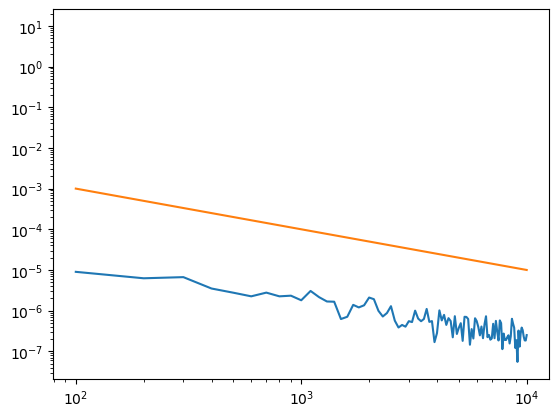

In [9]:
x2 = np.array(np.linspace(100, 10000, 100,dtype=int)) #use logscale
vec_y2 = np.vectorize(var_dsquare)
y2 = vec_y2(x2)
plt.plot(x2,y2)
yy2 = vec_yinvsq(x2)
plt.plot(x2,yy2)
plt.semilogy(10)
plt.semilogx(10)


Exercise 1.2 Point A

In [10]:
def f_1(x):
    return (np.exp(-x)/(1+(x-1)**2))

def I(f,N,b):
    vec_f = np.vectorize(f)
    v = np.random.rand(N)*b
    f_rand = vec_f(v)

    return b * np.mean(f_rand)

print(I(f_1,100,10))

def err_I(f,N,b,m):
    i=0
    a=np.empty((1,m))

    while i < m:
        a[0,i] = I(f,N,b) 
        i+=1
    var = np.var(a)
    return var #scipy integrate to calculate exact value

err_I(f_1,100,10,10)

#error is about (1/N)^1/2

0.6686177806869953


0.022327677366840114

Exercise 1.2 Point B

In [11]:
def G(x): #by hand
    return (1-np.exp(-1.46*x))

#def G_inverse(u): 
    x=2
    if u <= 1:
        while G(x) < u:
            x+=10
        while G(x) >= u:
                x-=0.001
    else:
         print("choose u<=1")
    return x

def G_inverse(u):
     return 1/1.46 * np.log(1/(1-u))

def foverg(x):
     return f_1(x)/(1.46*np.exp(-1.46*x))

def Inew(N,b):
    vec_f = np.vectorize(foverg)
    w = np.random.rand(N)
    vec_Ginv = np.vectorize(G_inverse)
    v = vec_Ginv(w)
    f_rand = vec_f(v)

    return np.mean(f_rand) #non ci va messo b

Inew(1000,10)

0.6905661221533553

Exercise 1.3 - Point A

In [3]:
import metropolis

1.5 -195.028 [0.17901991822221963, 0.008498647952758709]
1.6 -194.144 [0.2989312250000068, 0.033390823903435354]
1.7000000000000002 -189.284 [0.32880095224914124, 0.024552752440311017]
1.8000000000000003 -186.428 [0.38954872592591655, 0.021510891191435646]
1.9000000000000004 -178.632 [0.5051079800554042, 0.06266244173456874]
2.0000000000000004 -176.892 [0.6714281440000011, 0.07016451926266988]
2.1000000000000005 -155.22 [0.8318889904761895, 0.11500331578792261]
2.2000000000000006 -151.04 [1.3067813785123974, 0.17775565983350763]
2.3000000000000007 -145.296 [1.2213683327032112, 0.12961573349668715]
2.400000000000001 -133.0 [1.2545591388888881, 0.11773307426081196]
2.500000000000001 -117.232 [0.7790743859199998, 0.05962129818189323]
2.600000000000001 -118.052 [0.8172987834319521, 0.05008305811558287]
2.700000000000001 -93.484 [0.7739853673525368, 0.03853363974067311]
2.800000000000001 -93.92 [0.47870391632653, 0.03023703017975018]
2.9000000000000012 -83.504 [0.5463900290130795, 0.0603331

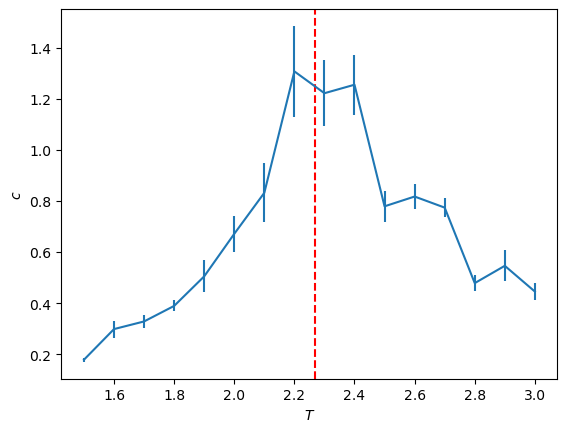

In [4]:
# a)
%run metropolis.py

The script plots the specific heat for a range of temperatures around the critical point Tc​. Note that the system is very small (4x4)

b) What are “typical” configurations at temperatures T ≫ Tc, T ≈ Tc and T ≪ Tc?

<function matplotlib.pyplot.show(close=None, block=None)>

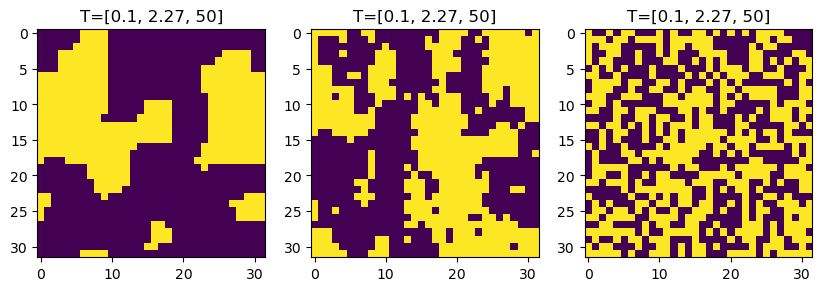

In [5]:
T = [0.1, 2.27, 50]
N_sweeps = 10000  # Number of steps for the measurements
N_eq = 1000  # Number of equilibration steps before the measurements start
N_flips = 10  # Number of steps between measurements

fig, axes = plt.subplots(1,3,figsize=(10,5))


for i in range(3):
    system = metropolis.prepare_system(32)
    metropolis.metropolis_loop(system, T[i], N_sweeps, N_eq, N_flips)
    axes[i].imshow(system, interpolation='none')
    axes[i].set_title("T="+str(T)) #no interpolation means that each pixel in the image
                                #corresponds directly to a value in the system configuration 
                                # without any smoothing or interpolation between pixels
plt.show


c) Plot the energy E and specific heat CV versus temperature T for different system
sizes L.

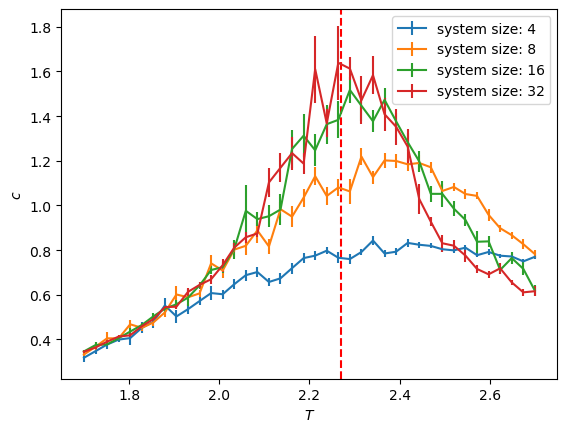

In [10]:
T_range = np.linspace(2.7, 1.7, 40)
L = [4,8,16,32]
N_bins = 10

for Ls in L:
    C_list = [] #specific heat
    system = metropolis.prepare_system(Ls)

    for i in range(len(T_range)):
        #print(T_range[i])
        C_list_bin = []
        for k in range(N_bins):
            Es = metropolis.metropolis_loop(system, T_range[i], 1000*Ls**2, N_eq, N_flips)

            mean_E = np.mean(Es)
            mean_E2 = np.mean(Es**2)

            #we estimate 10 specific heats for each temperature, each calculated with a new metropolis loop
            C_list_bin.append(1. / T_range[i]**2. / Ls**2. * (mean_E2 - mean_E**2))
        C_list.append([np.mean(C_list_bin), np.std(C_list_bin) / np.sqrt(N_bins)]) 
        #we finally calulate the mean and the variance of the 10 specific heats for each temperature

    C_list = np.array(C_list)
    plt.errorbar(T_range, C_list[:, 0], C_list[:, 1], label = "system size: {}".format(Ls))
    Tc = 2. / np.log(1. + np.sqrt(2))
    plt.xlabel('$T$')
    plt.ylabel('$c$')

plt.axvline(Tc, color='r', linestyle='--')
plt.legend()
plt.show()